In [52]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from IPython.display import display, Math

from bokeh.io import show, output_notebook
from bokeh.plotting import figure, show
from scipy.stats import norm 
from bokeh import plotting as pl
from bokeh.models import HoverTool, Arrow, OpenHead, NormalHead, VeeHead
from scipy.stats import chi2_contingency

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib notebook
output_notebook()


Loading BokehJS ...

In [11]:
np.random.seed(1)
# generating student heights 
mean = 5.7
std =0.6
student_heights= np.random.normal(mean,std,100000)

np.savetxt("student_heights.csv", student_heights)


# Lab 1 

## Problem statement 

Problem statement: Given a population of student heights. Generate a sampling distribution of means, where your sample size is 100 and you take 2000 samples. Hint: This means the sampling distribution will have 2000 points. Each point be the mean height of 100 students randomly pulled from the population. 

1) What is the mean and standard deviation of the population ? 

2) What is the mean and standard deviation of the sampling distribution? 



## Solution 


<IPython.core.display.Javascript object>


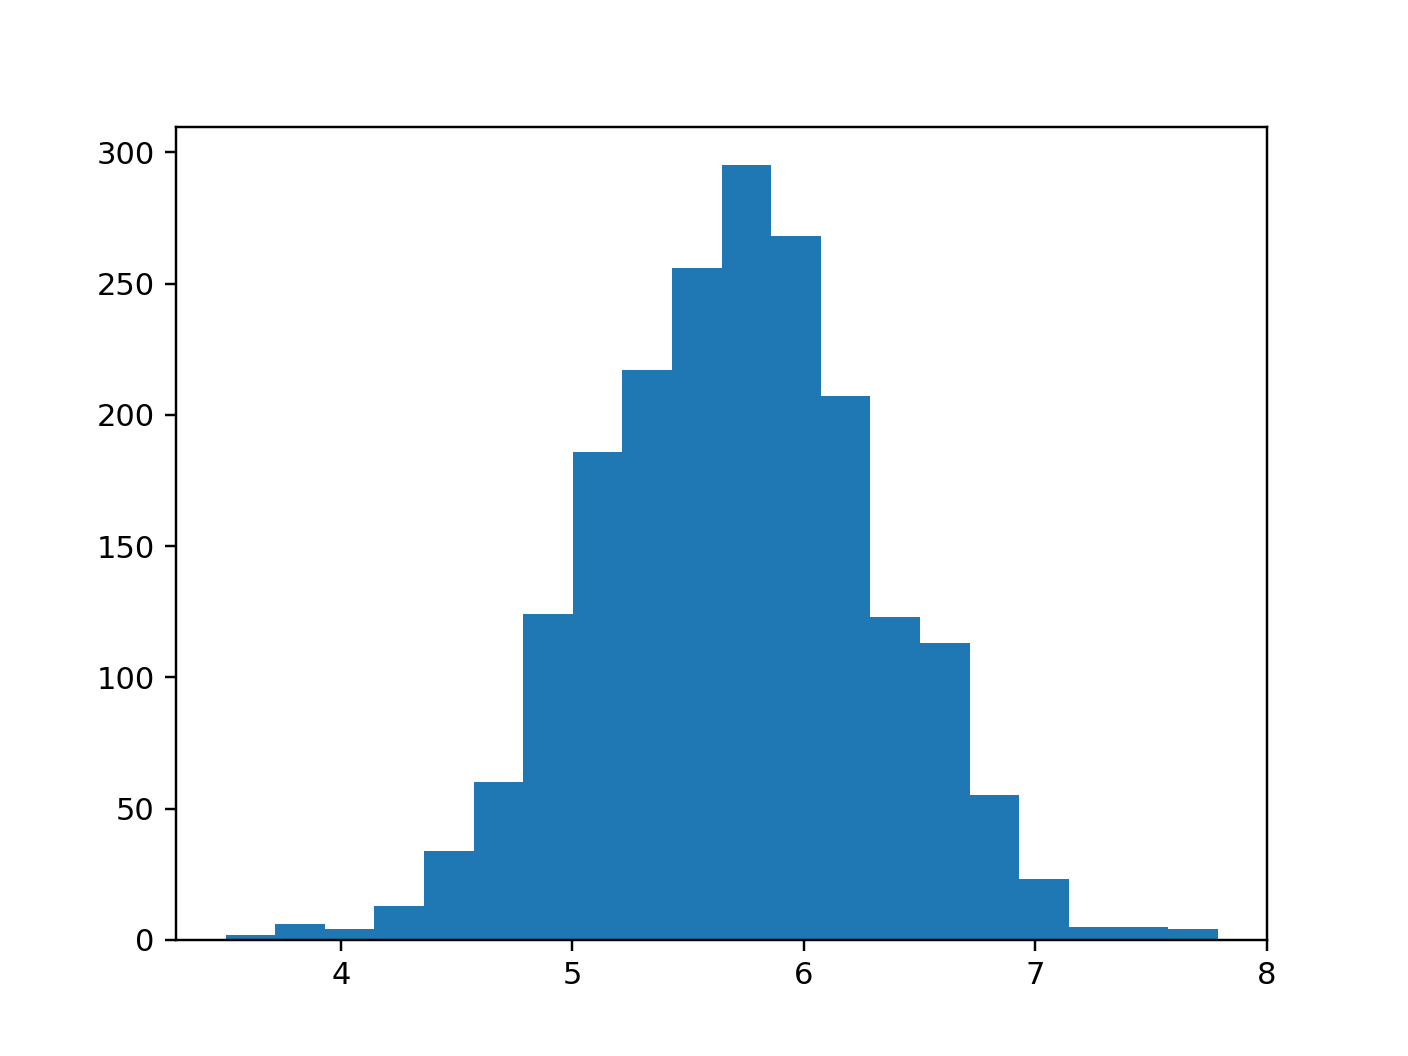

Mean of sampling distribution 5.707954792698541 
 Std of sampling distribution 0.6066935535625158 
 Mean of population 5.7031518170938105 
 Std of population 0.5989975641250417


In [46]:
random.seed(1)
# solution 

data = np.loadtxt("student_heights.csv")
num_per_sample = 1
samples = [random.sample(list(data),num_per_sample) for x in range(0,2000)]
mean_of_samples = [np.mean(np.asanyarray(x)) for x in samples]


mean_sampling_dist = np.mean(np.asanyarray(mean_of_samples))
std_sampling_dist = np.std(np.asanyarray(mean_of_samples))

mean_pop = np.mean(student_heights)
std_pop = np.std(student_heights)
plt.figure()
plt.hist(mean_of_samples, bins=20)
plt.show()

print("Mean of sampling distribution {} \n Std of sampling distribution {} \n Mean of population {} \n Std of population {}".format(mean_sampling_dist,
                                                                                                            std_sampling_dist,
                                                                                                            mean_pop, 
                                                                                                            std_pop ))


# lab 2 - Hypothesis testing z test

## problem statement 

Problem statement: 
    Given the data from lab 1. Suppose we come up with the hypothesis that after sampling 63 students, the height of all the students is 5.5 ft. For a significance level of 5% should we accept the null hypothesis (which is that the average height of students is 5.5 ft) ? You are going to need the population mean and the sampling population standard deviation to calculate the critical z value and put it into the calculator below to get the right values
    
    
 you are also going to need the calculator code below to check if the z test statistic value is in accept or reject region based on the significance level you set. 
 
 
 ```python

# Just run the below code

conf_int =0 
xrange =np.linspace(-5,5,10000)
pdf = norm(0,1).pdf(xrange)
#answer
tools_to_show= 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'        


def shade_reject_region(z_min,z_max ): 
    shade_x  = np.arange(z_min,z_max,0.001)
    shade_region  =norm.pdf(shade_x)
    
    shade_region[0] = 0 
    shade_region[-1] = 0
   
    return shade_x, shade_region

def get_sig_lvl(significance_level, z_c): 
    
    fig = pl.figure(x_range=[-5,5], 
                    plot_height=400,
                    tools = tools_to_show,
                    title="Enter significance level (in %) - Figure 3",
                    x_axis_label= "z-values",
                    y_axis_label ="Count")
    
    fig.line(x=xrange, y= pdf, line_width = 4)

    fig.xgrid.grid_line_color = None
    fig.y_range.start = 0
    
    hover = fig.select(dict(type=HoverTool))
    hover.tooltips = [("xvalue", "@x"), ("yvalue", "@y")]
   
    # calculate right 
    z_value = norm.ppf((significance_level)/100)
    right_shade, right_region= shade_reject_region(-5, z_value)
    fig.patch(right_shade, right_region, color="red", alpha =0.4)
    
    # calculate pvalue 
    p_value = norm.cdf(z_c)
    left_shade, left_region= shade_reject_region(-5, z_c,)
    fig.patch(left_shade, left_region, color="blue", alpha =0.4)
    
    fig.text(x=-0.8, y=0.2, text=["Acceptance \nregion"], )
    
#     # right reject region title
    
    reject_text_x = -4.15
    reject_text_y = 0.15
    fig.text(x =reject_text_x ,y = reject_text_y, text=["Significance level "])
    arrow_y_end = right_region[int(right_region.size/2)]+0.05
    arrow_x_end = right_shade[int(right_shade.size*0.99)]
    
    
    fig.add_layout(Arrow(end=NormalHead(fill_color="black"),
                   x_start=reject_text_x+1.75,
                   y_start=reject_text_y-0.001,
                   x_end=arrow_x_end,
                   y_end=arrow_y_end+0.01))

    # left reject region title 
    
    reject_text_x = -4.15
    reject_text_y = 0.1
    fig.text(x =reject_text_x ,y = reject_text_y, text=["Area = P-value"])
    arrow_y_end = left_region[int(left_region.size/2)]
    arrow_x_end = left_shade[int(left_shade.size*0.8)]
    
    
    fig.add_layout(Arrow(end=NormalHead(fill_color="black"),
                   x_start=reject_text_x+0.5,
                   y_start=reject_text_y-0.001,
                   x_end=arrow_x_end,
                   y_end=arrow_y_end+0.01))

    
    show(fig)

    print("z value for the given significance level: {} ".format(z_value))
    print("p value  :  {}".format(p_value))
    return None 




interact(get_sig_lvl, 
                 significance_level = widgets.FloatText(value = 5, 
                                                        min =50,
                                                        max = 99.9, 
                                                        step =0.001), 
                   z_c = widgets.FloatText(value = -2, 
                                                        min =-5,
                                                        max = 0, 
                                                        step =0.001)
                );


```

## Solution 


In [55]:
mean_sample = 5.5 
mean_pop =5.7
sigma_pop = 0.6 
sample_size = 63


z_c = (mean_sample-mean_pop)* (np.sqrt(sample_size)/sigma_pop)

print("cirtical value is {}".format( z_c))


# Just run the below code

conf_int =0 
xrange =np.linspace(-5,5,10000)
pdf = norm(0,1).pdf(xrange)
#answer
tools_to_show= 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'        


def shade_reject_region(z_min,z_max ): 
    shade_x  = np.arange(z_min,z_max,0.001)
    shade_region  =norm.pdf(shade_x)
    
    shade_region[0] = 0 
    shade_region[-1] = 0
   
    return shade_x, shade_region

def get_sig_lvl(significance_level, z_c): 
    
    fig = pl.figure(x_range=[-5,5], 
                    plot_height=400,
                    tools = tools_to_show,
                    title="Enter significance level (in %) - Figure 3",
                    x_axis_label= "z-values",
                    y_axis_label ="Count")
    
    fig.line(x=xrange, y= pdf, line_width = 4)

    fig.xgrid.grid_line_color = None
    fig.y_range.start = 0
    
    hover = fig.select(dict(type=HoverTool))
    hover.tooltips = [("xvalue", "@x"), ("yvalue", "@y")]
   
    # calculate right 
    z_value = norm.ppf((significance_level)/100)
    right_shade, right_region= shade_reject_region(-5, z_value)
    fig.patch(right_shade, right_region, color="red", alpha =0.4)
    
    # calculate pvalue 
    p_value = norm.cdf(z_c)
    left_shade, left_region= shade_reject_region(-5, z_c,)
    fig.patch(left_shade, left_region, color="blue", alpha =0.4)
    
    fig.text(x=-0.8, y=0.2, text=["Acceptance \nregion"], )
    
#     # right reject region title
    
    reject_text_x = -4.15
    reject_text_y = 0.15
    fig.text(x =reject_text_x ,y = reject_text_y, text=["Significance level "])
    arrow_y_end = right_region[int(right_region.size/2)]+0.05
    arrow_x_end = right_shade[int(right_shade.size*0.99)]
    
    
    fig.add_layout(Arrow(end=NormalHead(fill_color="black"),
                   x_start=reject_text_x+1.75,
                   y_start=reject_text_y-0.001,
                   x_end=arrow_x_end,
                   y_end=arrow_y_end+0.01))

    # left reject region title 
    
    reject_text_x = -4.15
    reject_text_y = 0.1
    fig.text(x =reject_text_x ,y = reject_text_y, text=["Area = P-value"])
    arrow_y_end = left_region[int(left_region.size/2)]
    arrow_x_end = left_shade[int(left_shade.size*0.8)]
    
    
    fig.add_layout(Arrow(end=NormalHead(fill_color="black"),
                   x_start=reject_text_x+0.5,
                   y_start=reject_text_y-0.001,
                   x_end=arrow_x_end,
                   y_end=arrow_y_end+0.01))

    
    show(fig)

    print("z value for the given significance level: {} ".format(z_value))
    print("p value  :  {}".format(p_value))
    return None 




interact(get_sig_lvl, 
                 significance_level = widgets.FloatText(value = 5, 
                                                        min =50,
                                                        max = 99.9, 
                                                        step =0.001), 
                   z_c = widgets.FloatText(value = z_c, 
                                                        min =-5,
                                                        max = 0, 
                                                        step =0.001)
                );



print("since the p-value is really small compared to the significance level of p= 0.05 we set, we reject the null hypothesis")

cirtical value is -2.6457513110645934


interactive(children=(FloatText(value=5.0, description='significance_level', step=0.001), FloatText(value=-2.6…

since the p-value is really small compared to the significance level of p= 0.05 we set, we reject the null hypothesis


# Lab 3 - chi square test 

## problem statement 

 you are given a contingency table generated from a data set. The data set represents men/women who like/dislike walking in the morning. You are asked, can you identify if these these categorical are related or not. How would you go about it? 
 
 Contingency table = [[36, 67],[32,59]]
 
 Hint: You are going to have to import chi square contingency function from scipy.stats, refer to the notebook for this.
 
 
 

## solution


In [56]:
chi_value, p_value, df_new, expected_values= chi2_contingency(np.array([[36,67],[32,59]]), correction= False)

print("chi squared value is {}".format(chi_value))
print("\n P-value is {}".format(p_value))
print("\n degrees of freedom of the table {}".format(df_new))
print("\n Exptected values  \n{}".format(expected_values))



chi squared value is 0.0009662814590611101

 P-value is 0.9752016978421504

 degrees of freedom of the table 1

 Exptected values  
[[36.10309278 66.89690722]
 [31.89690722 59.10309278]]
